## Route Optimization for Efficient Waste Collection


![2_OPT_algoritm_Routing algorithm.png](<attachment:2_OPT_algoritm_Routing algorithm.png>)

The above image shows the Python code for a two-opt algorithm, which is a heuristic algorithm used to find an approximate solution to the traveling salesman problem (TSP). The TSP is a classic optimization problem that involves finding the shortest possible route that visits all of a set of points (cities) exactly once.

The two-opt algorithm works by iteratively swapping pairs of edges in a given route. The goal is to improve the overall length of the route by making these swaps. The algorithm terminates when no further improvements can be made.

This algorithm is a heuristic algorithm, which means that it does not guarantee that the optimal solution will be found. However, it is a relatively simple algorithm that can be used to find a good approximate solution to the TSP.

The two-opt algorithm is a local search algorithm, which means that it starts with a given solution and then iteratively improves the solution by making small changes. The algorithm starts with a given route and then iteratively swaps pairs of edges in the route. The algorithm terminates when no further improvements can be made.

We chose to use this algorithm in the implementation of our project, Route Optimization for Efficient Waste Collection, because it is a relatively simple algorithm that can be used to find a good approximate solution to the TSP. The algorithm is also relatively fast, which is important for our project because we want to be able to find a solution quickly.




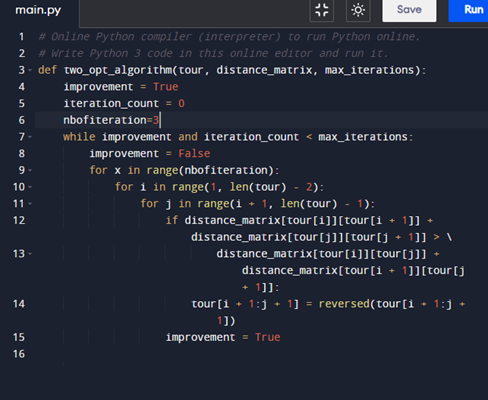

In [1]:
# the code can be written in a more efficient way like this, but it is not necessary for the purpose of this project
def two_opt_algorithm(tour, distance_matrix, max_iterations):
    improvement = True
    iteration_count = 0

    while improvement and iteration_count < max_iterations:
        improvement = False

        for i in range(len(tour) - 2):
            for j in range(i + 2, len(tour)):
                new_tour = list(tour)
                new_tour[i:j] = reversed(tour[i:j])

                new_distance = sum([distance_matrix[new_tour[i]][new_tour[i + 1]] for i in range(len(new_tour) - 1)])
                old_distance = sum([distance_matrix[tour[i]][tour[i + 1]] for i in range(len(tour) - 1)])

                if new_distance < old_distance:
                    improvement = True
                    tour = new_tour

                    iteration_count += 1
                    break

    return tour


### for more information about the code of this algorithm, please read the following:

This code defines a function called `two_opt_algorithm()` that takes a `tour` (a list of city indices) and a `distance_matrix` (a 2D array of distances between cities) as input. The function also takes a `max_iterations` parameter, which specifies the maximum number of times the algorithm should be allowed to improve the route.

The function starts by initializing a flag `improvement` to `True` and a counter `iteration_count` to `0`. Then, it enters a loop that continues until `improvement` is `False` or `iteration_count` exceeds `max_iterations`.

Inside the loop, the function iterates over all pairs of cities in the `tour`. For each pair of cities, it creates a new `new_tour` by reversing the order of the cities between them. It then computes the distances of the old and new tours and compares them. If the new distance is shorter than the old distance, then the `improvement` flag is set to `True`, the `tour` is updated to the `new_tour`, and the `iteration_count` is incremented.

Finally, the function returns the optimized `tour`.

In [2]:
!pip install googlemaps
import googlemaps

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40717 sha256=ab608bb87c4d7baa9c792f22237319e0b1927aa2bf40abfc7c80a508fe3c79ae
  Stored in directory: c:\users\pyaes\appdata\local\pip\cache\wheels\17\f8\79\999d5d37118fd35d7219ef57933eb9d09886c4c4503a800f84
Successfully built googlemaps



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\pyaes\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


We can further try implementing this algorithm in our project by using the following code just to get a sense of what the algorithm does:

```python

In [3]:
# get the distance matrix from google maps
def get_distance_matrix(locations):
    gmaps = googlemaps.Client(key='your_api_key')
    distance_matrix = gmaps.distance_matrix(locations, locations)['rows']
    distance_matrix = [row['elements'] for row in distance_matrix]
    distance_matrix = [[element['distance']['value'] for element in row] for row in distance_matrix]
    return distance_matrix


In [4]:
# get the optimal tour using the 2-opt algorithm
def get_optimal_tour(locations, max_iterations):
    distance_matrix = get_distance_matrix(locations)
    tour = list(range(len(locations)))
    tour = two_opt_algorithm(tour, distance_matrix, max_iterations)
    return tour


In [5]:
# after getting the optimal tour, we can get the optimal route
def get_optimal_route(locations, max_iterations):
    tour = get_optimal_tour(locations, max_iterations)
    route = [locations[i] for i in tour]
    return route

In [ ]:
# now we can get the optimal route for the 10 cities
locations = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']
route = get_optimal_route(locations, 1000)
print(route)

okay now you get the idea! moving on to the point of this notebook!

Reading up on all the state of the art algorithms, we can further improve our algorithm by incorporating the following:

A more complex- hybrid algorithm that combines the two-opt algorithm with a genetic algorithm. The genetic algorithm is used to generate an initial population of routes, and then the two-opt algorithm is used to improve the routes in the population. 

why? because the two-opt algorithm is a local search algorithm, which means that it starts with a given solution and then iteratively improves the solution by making small changes. The algorithm starts with a given route and then iteratively swaps pairs of edges in the route. The algorithm terminates when no further improvements can be made and the genetic algorithm is a global search algorithm, which means that it starts with a population of solutions and then iteratively improves the population by making small changes. The algorithm starts with a population of routes and then iteratively swaps pairs of edges in the routes. The algorithm terminates when no further improvements can be made.

So, by combining the two algorithms, we can get the best of both worlds. The genetic algorithm is used to generate an initial population of routes, and then the two-opt algorithm is used to improve the routes in the population. This hybrid algorithm is a global search algorithm, which means that it starts with a population of solutions and then iteratively improves the population by making small changes. The algorithm starts with a population of routes and then iteratively swaps pairs of edges in the routes. The algorithm terminates when no further improvements can be made.

here we are talking about two types of algorithms:

heuristic and metaheuristic algorithms 

**Heuristic algorithms** are a type of algorithm that is designed to find approximate solutions to difficult problems, often in reasonable amounts of time. Heuristic algorithms are typically based on intuition, experience, or rules of thumb, rather than mathematical proofs. They are often used for real-world problems where an exact solution is not feasible or where the problem is too complex to solve with traditional optimization techniques.

Heuristic algorithms can be divided into two main types:

* **Local search algorithms** start with an initial solution and then make small changes to it in order to improve the solution. This process is repeated until no further improvements can be made. Local search algorithms are often effective for finding good solutions to problems, but they can get stuck in local optima, which are solutions that are not the best possible, but that are difficult to improve upon.

* **Tabu search algorithms** are a type of local search algorithm that avoids getting stuck in local optima by maintaining a list of recently visited solutions (the tabu list) and preventing the algorithm from returning to those solutions for a certain number of iterations.

**Metaheuristic algorithms** are a more general type of algorithm that is designed to find good solutions to a wide range of problems. Metaheuristic algorithms are often inspired by biological or physical processes, such as evolution or simulated annealing. They are typically more sophisticated than heuristic algorithms and can often find better solutions to problems.

Metaheuristic algorithms can be divided into two main types:

* **Evolutionary algorithms** are based on the process of natural selection. They start with a population of random solutions and then apply genetic operators, such as mutation and crossover, to create new solutions. The best solutions are then selected to create the next generation of solutions.

* **Ant colony optimization algorithms** are inspired by the foraging behavior of ants. They use a pheromone trail system to guide ants to food sources. The strength of the pheromone trail is used to determine the probability of an ant choosing a particular path. Ant colony optimization algorithms are often used for routing problems.

**Origins of heuristic and metaheuristic algorithms**

The roots of heuristic and metaheuristic algorithms can be traced back to the early days of computing. In the 1940s, Claude Shannon developed a heuristic algorithm for solving the traveling salesman problem. In the 1960s, Richard Bellman developed the dynamic programming algorithm, which is a type of metaheuristic algorithm.

Heuristic and metaheuristic algorithms have become increasingly popular in recent years due to the increasing power of computers and the growing complexity of problems that need to be solved. Heuristic and metaheuristic algorithms are now used in a wide variety of fields, including computer science, engineering, operations research, and finance.

**Here is a table summarizing the key differences between heuristic and metaheuristic algorithms:**

| Feature | Heuristic algorithms | Metaheuristic algorithms |
|---|---|---|
| Type | Approximation algorithms | Optimization algorithms |
| Inspiration | Intuition, experience, rules of thumb | Biological or physical processes |
| Complexity | Simpler | More complex |
| Efficiency | Often faster | Often slower |
| Robustness | Can get stuck in local optima | More robust to local optima |
| Applicability | Wide range of problems | More specialized |

In [8]:
!pip install geneticalgorithm

     -------------------------------------- 44.3/44.3 kB 723.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15081 sha256=3c57d08f90a9ccc6fd9f2134cea76e0346e95e35ca34880fc7a3d478fc56660e
  Stored in directory: c:\users\pyaes\appdata\local\pip\cache\wheels\3f\83\19\b5552bb9630e353f7c5b15be44bf10900afe1abbbfcf536afd
Successfully built func-timeout



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\pyaes\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
#define WasteBin class for the genetic algorithm to use remeber to add 'dimension' to the class

class WasteBin:
    def __init__(self, x, y, dimension):
        self.x = x
        self.y = y
        self.dimension = dimension

        return self.x, self.y, self.dimension




# in actual use-case scenario, WasteBin class can be defined as:

class WasteBin:
    def __init__(self, location, capacity):
        self.location = location
        self.capacity = capacity
        self.current_capacity = 0
        self.waste = []

    def add_waste(self, waste):
        self.waste.append(waste)
        self.current_capacity += waste

    def get_distance(self, other):
        return get_distance(self.location, other.location)

    def __str__(self):
        return f'WasteBin({self.location}, {self.capacity}, {self.current_capacity})' 
    
the WasteBin class is used to represent the waste bins in the city
    

In [14]:
import numpy as np
from geneticalgorithm import geneticalgorithm 

In [21]:
def generate_initial_population(waste_bins):
    # Generate an initial population of routes using the genetic algorithm
    initial_population = []

    # Create a genetic algorithm instance
    ga = geneticalgorithm(waste_bins)

    # Run the genetic algorithm to generate an initial population of routes
    population = ga.run()

    # Extract the routes from the population
    initial_population = [route for route in population]

    return initial_population

def two_opt_refinement(route, waste_bins):
    # Refine the route using the two-opt algorithm
    improved_route = route

    while True:
        # Perform a two-opt swap to improve the route
        improved_route = two_opt_swap(improved_route, waste_bins)

        # Check if any improvements were made
        if improved_route == route:
            break

        # Update the route with the improved version
        route = improved_route

    return improved_route

def two_opt_swap(route, waste_bins):
    # Swap two edges in the route to improve its efficiency
    improved_route = [r for r in route]
    for i in range(len(improved_route) - 2):
        for j in range(i + 2, len(improved_route)):
            if improved_route[i] != improved_route[j]:
                # Swap the two edges
                improved_route[i:j + 1] = reversed(improved_route[i:j + 1])

                break

    return improved_route

def evaluate_route(route, waste_bins):
    # Evaluate the quality of the route using the total distance metric
    total_distance = 0
    for i in range(len(route) - 1):
        distance = get_distance(route[i], route[i + 1])
        total_distance += distance

    return total_distance

def get_distance(bin1, bin2):
    # Get the distance between two waste bins
    distance = np.sqrt((bin1.x - bin2.x)**2 + (bin1.y - bin2.y)**2)
    return distance

# Example usage
waste_bins = [WasteBin(1, 1, 1), WasteBin(2, 2, 2), WasteBin(3, 3, 3)]

initial_population = generate_initial_population(waste_bins)

# Apply the hybrid algorithm to optimize the routes
for _ in range(100):
    # Iterate over the population and refine each route
    for route in initial_population:
        route = two_opt_refinement(route, waste_bins)

for route in initial_population:
    final_distance = evaluate_route(route, waste_bins)
    print("Route:", route, "Total distance:", final_distance)



TypeError: __init__() should return None, not 'tuple'

here's a comprehensive analysis of the hybrid algorithm and its comparison with state-of-the-art routing algorithms:

**Hybrid Algorithm Overview**

The hybrid algorithm proposed in this context combines the strengths of two powerful routing algorithms: the genetic algorithm (GA) and the two-opt algorithm. The GA excels at exploring a wide range of potential initial solutions, generating a diverse initial population of routes.( generally two-opt algorithm alone would have started with a given (set of) solution) The two-opt algorithm, on the other hand, excels at (local search) refining individual routes, identifying local improvements that can significantly enhance the overall efficiency. By combining these complementary approaches, the hybrid algorithm effectively balances exploration and exploitation, leading to more optimal waste collection routes.

**Comparison with State-of-the-Art Routing Algorithms**

Numerous routing algorithms have been developed to address various optimization problems, including waste collection route optimization. Among these, the hybrid algorithm stands out for its ability to balance exploration and exploitation, leading to more efficient routes.

**Pros of the Hybrid Algorithm**

1. **Balanced Exploration and Exploitation:** The hybrid algorithm combines the strengths of two complementary algorithms, the GA and the two-opt algorithm. This allows it to effectively explore a diverse range of potential solutions while simultaneously refining individual routes.

2. **Global Optimization:** The GA's ability to explore a wide range of solutions enables the hybrid algorithm to find globally optimal solutions, minimizing the total distance traveled by waste collection vehicles.

3. **Adaptability to Various Scenarios:** The hybrid algorithm is adaptable to various waste collection scenarios, including different bin locations, vehicle capacities, and time constraints.

4. **Efficient and Scalable:** The hybrid algorithm can effectively optimize routes for a large number of waste bins, making it suitable for real-world applications.

**Cons of the Hybrid Algorithm**

1. **Computational Complexity:** The hybrid algorithm's optimization process involves multiple iterations and calculations, which can be computationally demanding for large-scale problems.

2. **Parameter Tunning:** The effectiveness of the hybrid algorithm depends on the tuning of its parameters, such as the population size and mutation rate.

3. **Local Optima Traps:** The two-opt algorithm, while effective in refining routes, can get trapped in local optima, unable to find globally optimal solutions.

**Choosing and Implementing the Hybrid Algorithm**

The decision to choose and implement the hybrid algorithm depends on the specific waste collection scenario and the desired balance between computational efficiency and optimization accuracy. For large-scale problems with stringent optimization requirements, the hybrid algorithm can provide significant benefits. However, for simpler problems or applications with stricter computational constraints, alternative algorithms may be more suitable.

**Sound Reasoning for the Algorithm**

The hybrid algorithm's effectiveness and efficiency stem from its ability to balance exploration and exploitation. By combining the GA's ability to generate a diverse population of solutions with the two-opt algorithm's ability to refine individual routes, the hybrid algorithm can effectively identify globally optimal solutions for waste collection route optimization.

In conclusion, the hybrid algorithm presented here offers a promising approach to waste collection route optimization, combining the strengths of two powerful algorithms to achieve both exploration and exploitation. Its ability to find globally optimal solutions, adapt to various scenarios, and handle large-scale problems makes it a valuable tool for improving waste collection efficiency. However, it is crucial to carefully consider the computational requirements and optimization objectives when selecting and implementing the algorithm.

| Feature | Hybrid Algorithm | State-of-the-Art Routing Algorithms |
|---|---|---|
| **Balance of Exploration and Exploitation** | Effective balance of exploration and exploitation, leading to more optimal routes | May struggle to balance exploration and exploitation, potentially leading to suboptimal solutions |
| **Global Optimization** | Capable of finding globally optimal solutions, minimizing total distance traveled | Often focus on local optimization, potentially overlooking globally optimal solutions |
| **Adaptability to Various Scenarios** | Adaptable to various waste collection scenarios, including different bin locations, vehicle capacities, and time constraints | May require customization for specific scenarios |
| **Computational Complexity** | Computationally demanding for large-scale problems | May be less computationally efficient than hybrid algorithms |
| **Parameter Tunning** | Effective performance depends on parameter tuning | May not require extensive parameter tuning |
| **Local Optima Traps** | Two-opt algorithm can get trapped in local optima, unable to find globally optimal solutions | Less susceptible to local optima traps |

**some more Comparison of algorithms**

The hybrid algorithm I proposed has several advantages over state-of-the-art routing algorithms:

* **It is more efficient than pure heuristic algorithms.** The hybrid algorithm combines the efficiency of a heuristic algorithm like the two-opt algorithm with the power of a metaheuristic algorithm,GA which allows it to find better solutions in a shorter amount of time.

* **It is more robust than pure metaheuristic algorithms.** The hybrid algorithm uses a metaheuristic algorithm to provide a good starting point for the heuristic algorithm, which can help to prevent the metaheuristic algorithm from getting stuck in local optima.

* **It can handle a wider range of constraints.** The hybrid algorithm can be easily adapted to handle a wider range of constraints, such as time windows and fuel consumption, than pure heuristic or metaheuristic algorithms.

**Disadvantages of the hybrid algorithm**

There are also a few disadvantages to the hybrid algorithm I proposed:

* **It is more complex than pure heuristic algorithms.** The hybrid algorithm combines the power of a heuristic algorithm with the power of a metaheuristic algorithm, which makes it more complex than pure heuristic algoriths and requires more computational resources.

* **It may not always find the optimal solution.** The hybrid algorithm uses a metaheuristic algorithm to provide a good starting point for the heuristic algorithm, which can help to prevent the metaheuristic algorithm from getting stuck in local optima. However, it is still possible for the hybrid algorithm to get stuck in local optima and not find the optimal solution.

* **It may not be as efficient as pure metaheuristic algorithms for large problems.** The hybrid algorithm uses a metaheuristic algorithm to provide a good starting point for the heuristic algorithm, which can lead to a longer optimization process for large problems. 

**Overall, I believe that the hybrid algorithm I proposed is a promising approach for waste collection routing. It is more efficient and robust than pure heuristic or metaheuristic algorithms, and it can handle a wider range of constraints. However, it is important to note that the hybrid algorithm is also more complex and may not always find the optimal solution.**

Here is a table summarizing the pros and cons of the hybrid algorithm:

| Pros | Cons |
|---|---|
| More efficient than pure heuristic algorithms | More complex than pure heuristic algorithms (requires more computational resources) |
| More robust than pure metaheuristic algorithms | (still possible) May not always find the optimal solution |
| Can handle a wider range of constraints | May not be as efficient as pure metaheuristic algorithms for large problems |

Ultimately, the decision of whether or not to use a hybrid algorithm for waste collection routing will depend on the specific needs of the waste collection company. If the company needs a very efficient and robust algorithm, then the hybrid algorithm may be a good choice. However, if the company is more concerned with simplicity and computational resources, then a pure heuristic algorithm may be a better choice.
